In [204]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [205]:
data = pd.read_csv("fifa21_training.csv")
data.columns=data.columns.str.lower()
data

,unnamed: 0,id,name,age,nationality,club,bp,position,team & contract,height,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,11284,239074,S. Aw,21,Senegal,Gil Vicente FC,LB,LB,Gil Vicente FC 2020 ~ 2023,"5'8""",...,52+2,52+2,58+2,58+2,54+2,54+2,54+2,58+2,15+2,60
13696,11964,241223,S. Mogi,21,Japan,Cerezo Osaka,GK,GK,Cerezo Osaka 2017 ~ 2021,"6'5""",...,23+2,23+2,20+2,20+2,22+2,22+2,22+2,20+2,58+2,59
13697,5390,210930,Carles Gil,27,Spain,New England Revolution,RM,RM CAM CM,New England Revolution 2019 ~ 2024,"5'7""",...,60+2,60+2,62+2,57+2,47+2,47+2,47+2,57+2,18+2,76
13698,860,162993,J. Perch,34,England,Mansfield Town,CDM,CDM RB CM,Mansfield Town 2020 ~ 2021,"5'11""",...,62+1,62+1,60+2,60+2,63+0,63+0,63+0,60+2,14+2,63


In [206]:
data.columns
# data.columns.tolist()

Index(['unnamed: 0', 'id', 'name', 'age', 'nationality', 'club', 'bp',
       'position', 'team & contract', 'height',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'ova'],
      dtype='object', length=102)

In [207]:
data_l = data[["attacking","skill","defending","movement","hits","phy","def","dri","pas","sho","pac","value","wage","fk accuracy","movement","agility","power","mentality","positioning","composure","goalkeeping","gk handling","bp","position","foot","a/w","d/w","aggression","total stats","base stats","nationality",'gk',"age","growth","height","weight"]]
data_l

,attacking,skill,defending,movement,hits,phy,def,dri,pas,sho,...,d/w,aggression,total stats,base stats,nationality,gk,age,growth,height,weight
0,258,286,148,346,3,60,51,63,63,51,...,Medium,54,1682,357,Switzerland,15+1,26,1,"5'9""",161lbs
1,365,375,77,404,44,71,33,82,68,75,...,Low,54,1961,412,China PR,18+2,30,0,"6'0""",159lbs
2,336,424,80,424,73,56,27,86,78,77,...,Medium,75,1925,404,Italy,12+2,33,0,"5'4""",134lbs
3,242,259,168,282,7,60,57,57,54,44,...,Medium,61,1527,329,Wales,14+2,22,13,"5'10""",152lbs
4,249,280,185,324,4,66,60,64,60,44,...,Medium,66,1664,360,France,15+2,23,8,"5'11""",150lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,197,207,167,344,4,57,53,55,46,28,...,Medium,59,1443,315,Senegal,15+2,21,11,"5'8""",143lbs
13696,77,70,36,192,3,54,30,62,57,55,...,Medium,21,928,318,Japan,58+2,21,9,"6'5""",176lbs
13697,332,373,118,351,15,60,39,77,78,69,...,Medium,41,1867,388,Spain,18+2,27,0,"5'7""",146lbs
13698,268,261,182,288,4,69,61,58,58,47,...,Medium,74,1639,346,England,14+2,34,0,"5'11""",176lbs


In [208]:
nulls_p = (data_l.isna().sum()/len(data))*100
nulls_p = nulls_p.reset_index()
nulls_p.columns=["Columna", "Porcentaje"]
nulls_p

,Columna,Porcentaje
0,attacking,0.000000
1,skill,0.000000
2,defending,0.000000
3,movement,0.000000
4,hits,0.000000
5,phy,0.000000
6,def,0.000000
7,dri,0.000000
8,pas,0.000000
9,sho,0.000000


In [209]:
duplicados = data_l.duplicated()
num_duplicados = duplicados.sum()
print(f'Hay {num_duplicados} filas duplicadas')

Hay 0 filas duplicadas


In [210]:
data_number = data_l.select_dtypes(include = np.number)
data_number

,attacking,skill,defending,movement,phy,def,dri,pas,sho,pac,...,mentality,positioning,composure,goalkeeping,gk handling,aggression,total stats,base stats,age,growth
0,258,286,148,346,60,51,63,63,51,69,...,290,62.0,54.0,48,12,54,1682,357,26,1
1,365,375,77,404,71,33,82,68,75,83,...,313,78.0,70.0,55,7,54,1961,412,30,0
2,336,424,80,424,56,27,86,78,77,80,...,332,80.0,82.0,21,3,75,1925,404,33,0
3,242,259,168,282,60,57,57,54,44,57,...,257,31.0,48.0,42,9,61,1527,329,22,13
4,249,280,185,324,66,60,64,60,44,66,...,294,55.0,58.0,52,9,66,1664,360,23,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,197,207,167,344,57,53,55,46,28,76,...,232,51.0,59.0,51,15,59,1443,315,21,11
13696,77,70,36,192,54,30,62,57,55,60,...,88,4.0,33.0,288,55,21,928,318,21,9
13697,332,373,118,351,60,39,77,78,69,65,...,306,75.0,75.0,58,15,41,1867,388,27,0
13698,268,261,182,288,69,61,58,58,47,53,...,297,54.0,60.0,43,7,74,1639,346,34,0


In [211]:
def rell_media(df):
    media_por_columna = df.mean(axis=0)
    df = df.fillna(media_por_columna)
    return df

In [212]:
data_number = rell_media(data_number)

In [213]:
nulls_p = (data_number.isna().sum()/len(data))*100
nulls_p = nulls_p.reset_index()
nulls_p.columns=["Columna", "Porcentaje"]
nulls_p

,Columna,Porcentaje
0,attacking,0.0
1,skill,0.0
2,defending,0.0
3,movement,0.0
4,phy,0.0
5,def,0.0
6,dri,0.0
7,pas,0.0
8,sho,0.0
9,pac,0.0


In [214]:
data_cat = data_l.select_dtypes(include="object")
data_cat

,hits,value,wage,bp,position,foot,a/w,d/w,nationality,gk,height,weight
0,3,€525K,€4K,CM,CM CDM,Right,High,Medium,Switzerland,15+1,"5'9""",161lbs
1,44,€8.5M,€23K,ST,ST LW LM,Right,High,Low,China PR,18+2,"6'0""",159lbs
2,73,€9M,€49K,CAM,CAM CF,Right,High,Medium,Italy,12+2,"5'4""",134lbs
3,7,€275K,€4K,CDM,CDM CM,Right,Medium,Medium,Wales,14+2,"5'10""",152lbs
4,4,€725K,€2K,CDM,CDM CM,Right,Low,Medium,France,15+2,"5'11""",150lbs
...,...,...,...,...,...,...,...,...,...,...,...,...
13695,4,€325K,€1K,LB,LB,Left,High,Medium,Senegal,15+2,"5'8""",143lbs
13696,3,€190K,€700,GK,GK,Right,Medium,Medium,Japan,58+2,"6'5""",176lbs
13697,15,€8M,€9K,RM,RM CAM CM,Left,High,Medium,Spain,18+2,"5'7""",146lbs
13698,4,€140K,€4K,CDM,CDM RB CM,Right,Medium,Medium,England,14+2,"5'11""",176lbs


In [215]:
def rell_str_moda(df):
    cols_string = df.select_dtypes(include='object').columns
    for col in cols_string:
        moda = df[col].mode().iloc[0]
        df[col] = df[col].fillna(moda)
    return df

In [216]:
data_cat = rell_str_moda(data_cat)

In [217]:
nulls_p = (data_cat.isna().sum()/len(data))*100
nulls_p = nulls_p.reset_index()
nulls_p.columns=["Columna", "Porcentaje"]
nulls_p

,Columna,Porcentaje
0,hits,0.0
1,value,0.0
2,wage,0.0
3,bp,0.0
4,position,0.0
5,foot,0.0
6,a/w,0.0
7,d/w,0.0
8,nationality,0.0
9,gk,0.0


In [218]:
col_mean = data_number.mean()
data_number = data_number.fillna(col_mean)

In [219]:
data_cat.columns.tolist()

['hits',
 'value',
 'wage',
 'bp',
 'position',
 'foot',
 'a/w',
 'd/w',
 'nationality',
 'gk',
 'height',
 'weight']

<AxesSubplot:>

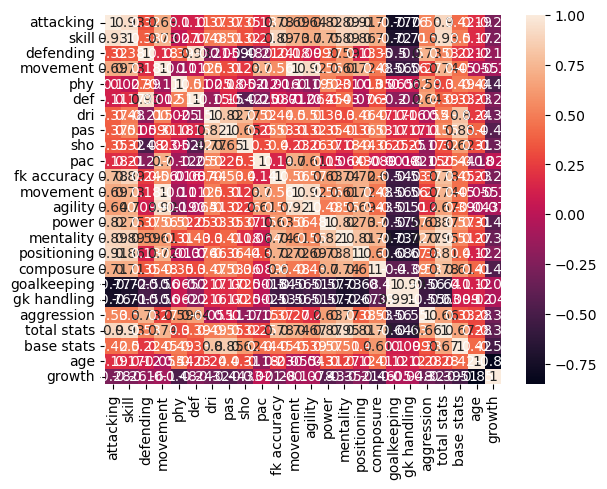

In [220]:
corr_matrix=data_number.corr()
sns.heatmap(corr_matrix,annot=True)

In [221]:
# sns.pairplot(data=data, hue="species")plt.show()

<AxesSubplot:xlabel='attacking', ylabel='Density'>

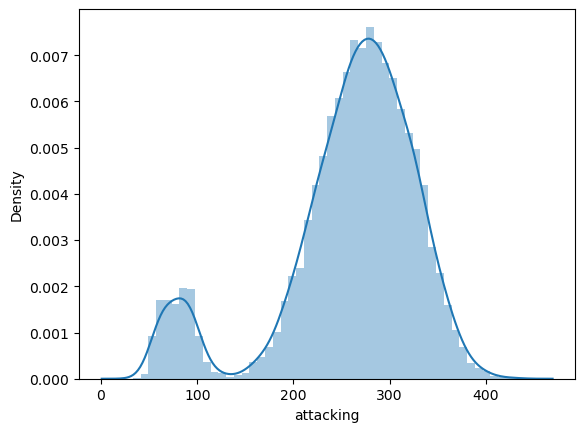

In [222]:
sns.distplot(data_number["attacking"])

<AxesSubplot:xlabel='attacking'>

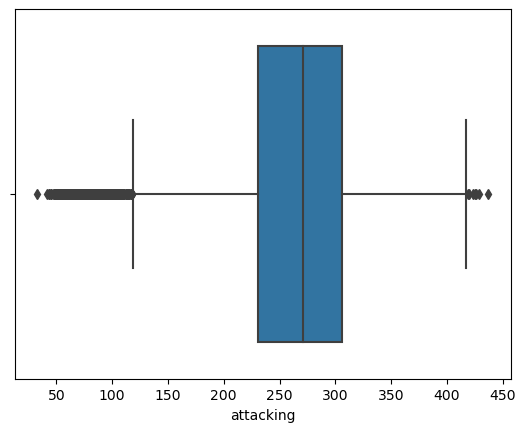

In [223]:
sns.boxplot(data_number["attacking"])

<AxesSubplot:xlabel='skill', ylabel='Density'>

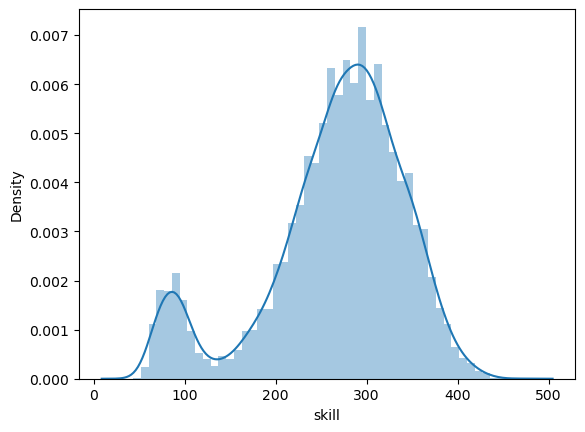

In [224]:
sns.distplot(data_number["skill"])

<AxesSubplot:xlabel='skill'>

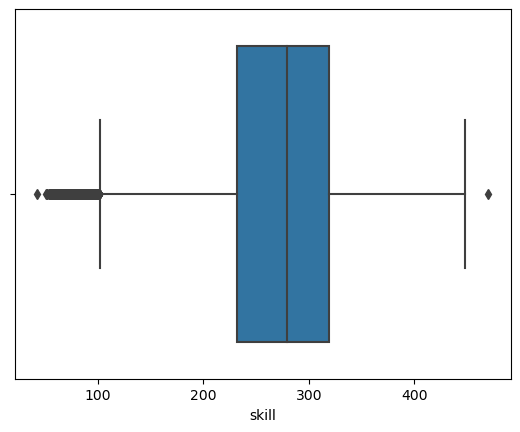

In [225]:
sns.boxplot(data_number["skill"])

<AxesSubplot:xlabel='attacking', ylabel='Density'>

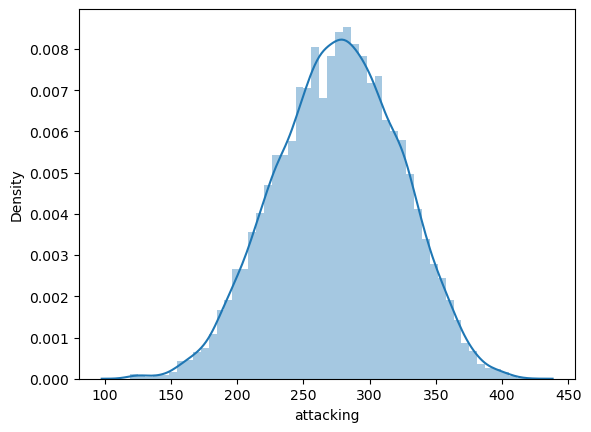

In [226]:
iqr = np.percentile(data_number['attacking'],75) - np.percentile(data_number['attacking'],25)
upper_limit = np.percentile(data_number['attacking'],75) + 1.5*iqr
lower_limit = np.percentile(data_number['attacking'],25) - 1.5*iqr
number1 = data_number[(data_number['attacking']>lower_limit) & (data_number['attacking']<upper_limit)]
sns.distplot(number1['attacking'])

<AxesSubplot:xlabel='attacking'>

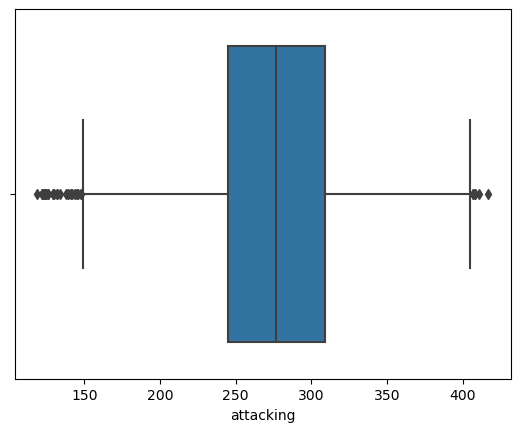

In [227]:
sns.boxplot(number1['attacking'])

<AxesSubplot:xlabel='skill', ylabel='Density'>

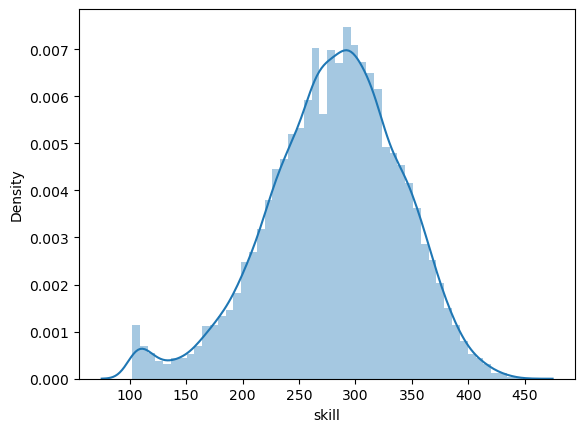

In [228]:
iqr = np.percentile(data_number['skill'],75) - np.percentile(data_number['skill'],25)
upper_limit = np.percentile(data_number['skill'],75) + 1.5*iqr
lower_limit = np.percentile(data_number['skill'],25) - 1.5*iqr
number1 = data_number[(data_number['skill']>lower_limit) & (data_number['skill']<upper_limit)]
sns.distplot(number1['skill'])

<AxesSubplot:xlabel='skill'>

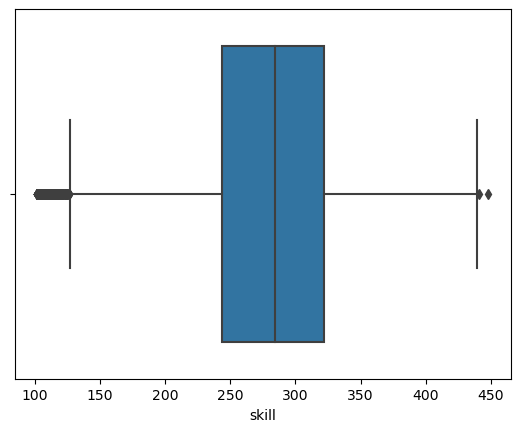

In [229]:
sns.boxplot(number1['skill'])

<AxesSubplot:ylabel='Density'>

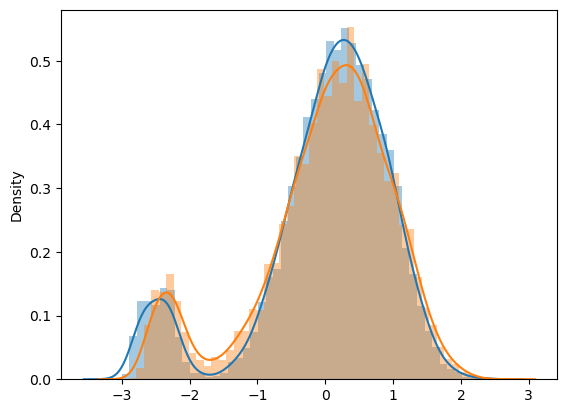

In [230]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(data_number)
x_StaSca = transformer.transform(data_number)
sns.distplot(x_StaSca.T[0])
sns.distplot(x_StaSca.T[1])

In [231]:
from sklearn.preprocessing import LabelEncoder

lebel = data_cat.apply(LabelEncoder().fit_transform)
lebel

,hits,value,wage,bp,position,foot,a/w,d/w,nationality,gk,height,weight
0,213,154,76,4,165,1,0,2,140,20,10,20
1,314,192,37,14,565,1,0,1,28,33,11,19
2,422,209,75,0,5,1,0,2,74,9,5,8
3,414,75,76,2,100,1,2,2,157,17,1,16
4,291,186,50,2,100,1,1,2,51,21,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...
13695,291,98,29,6,215,0,0,2,129,21,9,12
13696,213,39,104,5,212,1,2,2,77,84,16,27
13697,62,201,141,11,419,0,0,2,137,33,8,13
13698,291,23,76,2,117,1,2,2,45,17,2,27


In [232]:
data_transformed = np.concatenate([lebel,x_StaSca],axis=1)
data_transformed

array([[ 2.13000000e+02,  1.54000000e+02,  7.60000000e+01, ...,
        -1.07236336e-01,  1.44396400e-01, -7.77980851e-01],
       [ 3.14000000e+02,  1.92000000e+02,  3.70000000e+01, ...,
         1.25898755e+00,  9.53405980e-01, -9.50484940e-01],
       [ 4.22000000e+02,  2.09000000e+02,  7.50000000e+01, ...,
         1.06026408e+00,  1.56016317e+00, -9.50484940e-01],
       ...,
       [ 6.20000000e+01,  2.01000000e+02,  1.41000000e+02, ...,
         6.62817128e-01,  3.46648795e-01, -9.50484940e-01],
       [ 2.91000000e+02,  2.30000000e+01,  7.60000000e+01, ...,
        -3.80481114e-01,  1.76241556e+00, -9.50484940e-01],
       [ 3.45000000e+02,  1.33000000e+02,  2.90000000e+01, ...,
        -5.54364155e-01, -1.47362276e+00,  1.80958049e+00]])

In [233]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

x_train,x_test,y_train,y_test = train_test_split(data_transformed,data["ova"],test_size=0.2,random_state=19) 
lm=linear_model.LinearRegression().fit(x_train,y_train)
predictions=lm.predict(x_train)

In [234]:
predictions

array([70.81711437, 63.1616658 , 57.27203199, ..., 67.91390193,
       55.9296709 , 67.34883584])

In [235]:
y_train

9664     67
3470     67
12341    58
6014     76
5331     56
         ..
1043     77
5032     66
1378     66
757      55
10862    68
Name: ova, Length: 10960, dtype: int64

In [236]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_absolute_error
r2_score(y_train,predictions)

0.8446210720050731

In [237]:
mean_squared_error(y_train,predictions)

7.2921396752782535

In [238]:
median_absolute_error(y_train,predictions)

1.7404526656671635

In [239]:
mean_absolute_error(y_train,predictions)

2.1122899652731255